<a href="https://colab.research.google.com/github/irinap9270/hg_ml/blob/main/Ch5-1.%20DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# """로지스틱 회귀로 와인 분류"""

In [1]:
import pandas as pd

# 판다스를 이용하여 데이터 불러옴
wine = pd.read_csv('https://bit.ly/wine_csv_data')

# 처음 5개 데이터 확인
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# 각 열의 데이터타입과 누락된 데이터 확인
wine.info()
# 열에 대한 간략한 통계 출력
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
# 넘파이 배열로 전환
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 훈련 세트와 테스트 세트로 나눔
# test_size; 테스트 세트의 비율
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
# 훈련 세트와 테스트 세트 크기 확인
print(train_input.shape, test_input.shape)

# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 모델 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

(5197, 3) (1300, 3)
0.7808350971714451
0.7776923076923077


훈련 세트와 테스트 점수가 모두 낮다 > 과소적합

> 결정트리 모델로 학습해보면 어떨까?

# """결정트리"""

In [5]:
from sklearn.tree import DecisionTreeClassifier # 결정트리 알고리즘
# 결정트리 모델 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


> 훈련 세트 점수 > 테스트 세트 점수

이므로, 과대적합 되었다고 볼 수 있다.

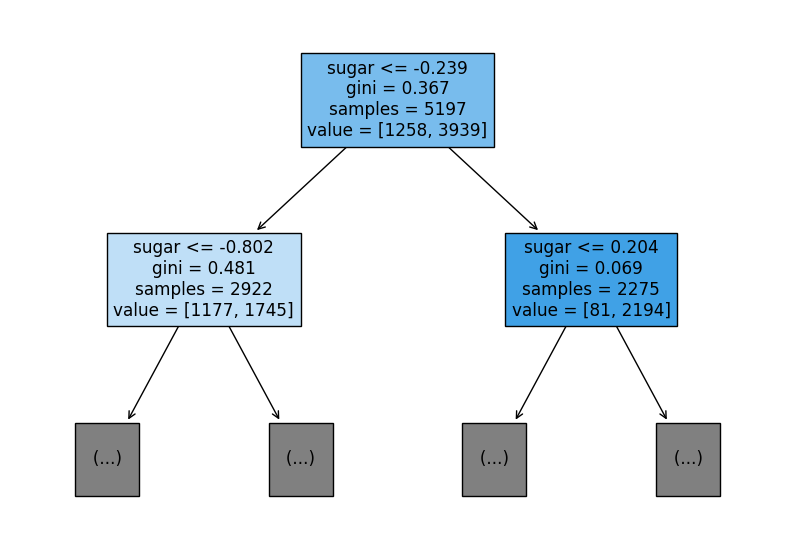

In [8]:
# 결정트리 그림 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
# max_depth; 트리의 깊이를 제한
# filled; 노드의 색(어떤 클래스의 비율이 높아지면 진한 색으로 표시)
# feature_names; 특성의 이름을 전달
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

위의 그림에서, 'gini'는 '지니 불순도'를 의미한다.

> 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)

지니 불순도가 0이 되는 노드를 '순수 노드'라고 한다.

불순도는 클래스 비율을 사용하여 계산한다.

> 표준화 전처리를 할 필요가 없다.

# """가지치기"""

> 끝까지 자라나는 트리를 만들면 훈련 세트에 과대적합된다.

In [12]:
# max_depth를 3으로 설정하여 학습
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

#특성 중요도를 출력
print(dt.feature_importances_)

0.8454877814123533
0.8415384615384616
[0.12345626 0.86862934 0.0079144 ]


당도가 가장 유용한 특성인 것을 알 수 있다.